<a href="https://colab.research.google.com/github/ravilon/ufpel-pdi/blob/main/LAB9_Processamento_Morfologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB9 — Processamento Morfológico

Disciplina: **Processamento Digital de Imagens (PDI)** – UFPel  
Professor: **Guilherme Corrêa**  

Vamos utilizar a imagem `digital.png` nos exercícios.

---

## Objetivos  

1. Carregar uma imagem PNG com problemas de descontinuidade e ruído.

2. Implementar a função de erosão.

3. Explorar o uso de dilatação, erosão, abertura e fechamento e suas combinações.
---


## Bibliotecas úteis
Se estiver no Colab, rode a célula de instalação uma única vez.

In [6]:
# Se estiver no Colab, descomente a linha abaixo para garantir o OpenCV instalado
# !pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import files


## Upload de uma imagem

Vamos usar `files` do `google.colab` para fazer upload de uma imagem colorida e a biblioteca OpenCV (`cv2`) para abri-la.

Sugestão: utilizar a imagem `tuyuka.png`, que está disponível no repositório para os exercícios. A imagem está no formato RGB.

Saving digital.png to digital (1).png
Arquivo enviado: digital (1).png
Formato da imagem: (768, 512)
Valor de limiarização: 127.0


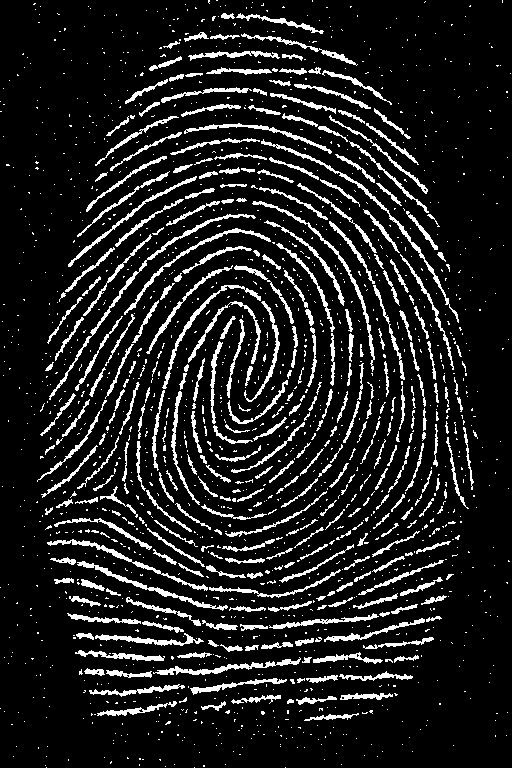

In [9]:
from google.colab.patches import cv2_imshow

# Faça upload de uma imagem PNG
uploaded = files.upload()

# Pega o nome do primeiro arquivo enviado
img_name = list(uploaded.keys())[0]
print("Arquivo enviado:", img_name)

# Lê a imagem com OpenCV
img = cv2.imread(img_name, 0)
# binariza (se necessário)
x, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

print("Formato da imagem:", img.shape)
print("Valor de limiarização:", x)

# Mostra a imagem original
cv2_imshow(img)

# Funções: Erosão e Dilatação

Abaixo está implementada a função de DILATAÇÃO, que recebe uma imagem e um kernel (elemento estruturante) e retorna a imagem dilatada pelo kernel.

**Perceba a regra geral da DILATAÇÃO**: Um pixel vira 1 na dilatação se **qualquer** pixel do elemento estruturante sobreposto estiver cobrindo algum pixel 1 da imagem.


In [11]:
def dilatacao(img, kernel):
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h = kh // 2
    pad_w = kw // 2

    # imagem de saída inicializada com zeros
    out = np.zeros_like(img)

    # aplica padding
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    for i in range(h):
        for j in range(w):
            # extrai vizinhança
            region = padded[i:i+kh, j:j+kw]

            # se qualquer pixel da região onde o kernel é 1 for branco, o pixel vira branco
            if np.any(region[kernel == 1] == 255):
                out[i, j] = 255

    return out

In [17]:
# AQUI VOCÊ DEVERÁ IMPLEMENTAR A EROSÃO
def erosao(img, kernel):
  h, w = img.shape
  kh, kw = kernel.shape
  pad_h = kh // 2
  pad_w = kw // 2

  # imagem de saída inicializada com zeros
  out = np.zeros_like(img)

  # aplica padding
  padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0) # pixels adicionados são pretos

  for i in range(h):
      for j in range(w):
          # extrai vizinhança
          region = padded[i:i+kh, j:j+kw]

          # se TODOS os pixels da região onde o kernel é 1 forem brancos, o pixel vira branco
          if np.all(region[kernel == 1] == 255):
              out[i, j] = 255
  return out







# 🖼️ Tarefa: Uso das funções Erosão e Dilatação

- Agora você deverá explorar o uso combinado de erosão e dilatação para melhorar a imagem de exemplo neste exercício.
- Você pode combinar diversas etapas de erosão e dilatação, construir aberturas, fechamentos, etc.
- A cada passo, apresente a imagem resultante com cv2_imshow(img)


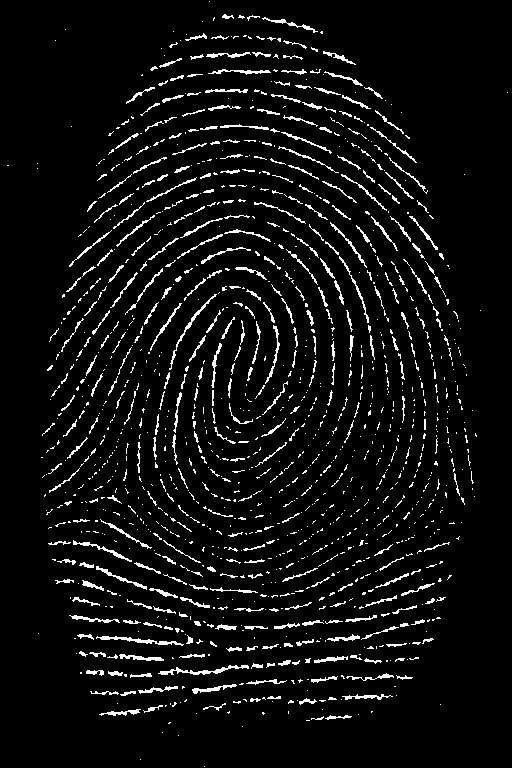

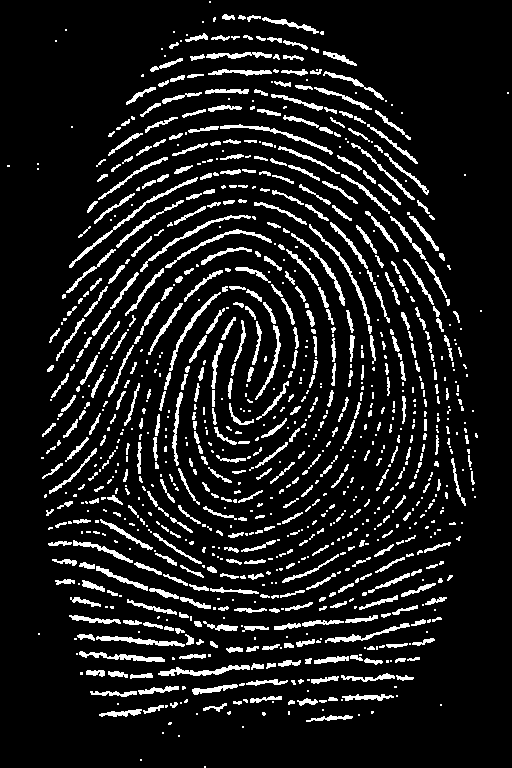

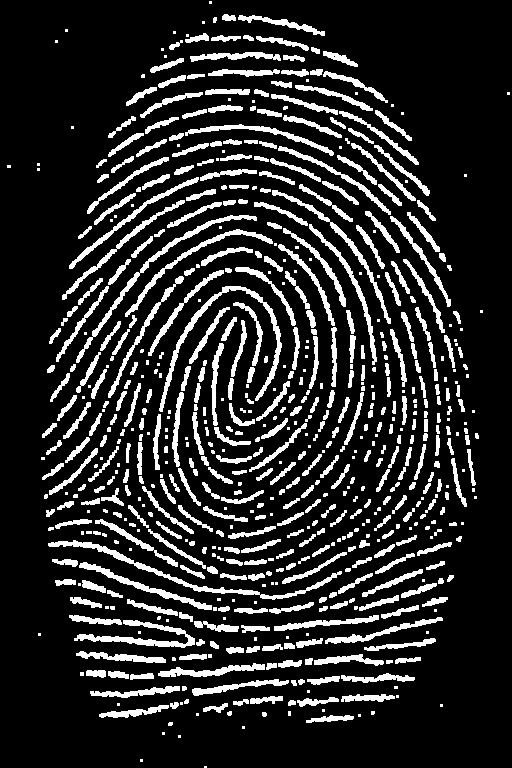

In [36]:
import cv2
from google.colab.patches import cv2_imshow

step2 = erosao(img,  np.ones((2, 2), np.uint8))
cv2_imshow(step2)

step3 = dilatacao(step2, np.ones((2, 2), np.uint8))
cv2_imshow(step3)

step4 = dilatacao(step3, np.ones((2, 2), np.uint8))
cv2_imshow(step4)
